<a href="https://colab.research.google.com/github/RodrigodeFeo/8DTS/blob/main/Trabalho_Integrado_ML_RM351578.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabalho Integrado Machine Learn
1.   RM351578 - Rodrigo de Feo Vieira
2.   RM
3.   RM
4.   RM

Vamos iniciar com os imports

In [2]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Efetuando a leitura da base

In [3]:
#Efetuando a leitura da base
# Carregar um arquivo CSV do sistema local
from google.colab import files
uploaded = files.upload()

# Selecione o nome do arquivo CSV que você carregou
filename = list(uploaded.keys())[0]

# Carregar o arquivo CSV em um DataFrame do pandas
df_cliente_score = pd.read_csv(filename)

# Exibir as primeiras linhas do DataFrame
print(df_cliente_score.head())


Saving test.csv to test (1).csv
       ID Customer_ID      Month             Name  Age          SSN  \
0  0x160a   CUS_0xd40  September    Aaron Maashoh   23  821-00-0265   
1  0x160b   CUS_0xd40    October    Aaron Maashoh   24  821-00-0265   
2  0x160c   CUS_0xd40   November    Aaron Maashoh   24  821-00-0265   
3  0x160d   CUS_0xd40   December    Aaron Maashoh  24_  821-00-0265   
4  0x1616  CUS_0x21b1  September  Rick Rothackerj   28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12            1824.843333                  3  ...   
2  Scientist      19114.12            1824.843333                  3  ...   
3  Scientist      19114.12                    NaN                  3  ...   
4    _______      34847.84            3037.986667                  2  ...   

   Num_Credit_Inquiries  Credit_Mix Outstanding_Debt Credit_Utilization_Ratio 

Agora iremos comecar a nossa analise do dataset

In [4]:
#Exibindo os dados
df_cliente_score.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [5]:
#Vamos avaliar os tipos e nulos
df_cliente_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

Para iniciarmos a analise da base primeiro vamos remover as colunas que nao agregam informacoes relevantes para o nosso modelo apenas avaliando o conteudo da variavel

In [6]:
#Removendo as colunas
df_cliente_score_rev = df_cliente_score
df_cliente_score_rev = df_cliente_score_rev.drop('ID',axis=1) #Feature ID com valor unico por linha
df_cliente_score_rev = df_cliente_score_rev.drop('Customer_ID',axis=1) #Feature ID do Cliente com valor unico por cliente
df_cliente_score_rev = df_cliente_score_rev.drop('Month',axis=1)#Feature Mes representa o mes do cadastro
df_cliente_score_rev = df_cliente_score_rev.drop('Name',axis=1)#Feature Nome representa o nome cliente no cadastro
df_cliente_score_rev = df_cliente_score_rev.drop('SSN',axis=1)#Feature Cadastro Social Americano representa o numero social do cliente no cadastro
df_cliente_score_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  object 
 1   Occupation                50000 non-null  object 
 2   Annual_Income             50000 non-null  object 
 3   Monthly_Inhand_Salary     42502 non-null  float64
 4   Num_Bank_Accounts         50000 non-null  int64  
 5   Num_Credit_Card           50000 non-null  int64  
 6   Interest_Rate             50000 non-null  int64  
 7   Num_of_Loan               50000 non-null  object 
 8   Type_of_Loan              44296 non-null  object 
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    46502 non-null  object 
 11  Changed_Credit_Limit      50000 non-null  object 
 12  Num_Credit_Inquiries      48965 non-null  float64
 13  Credit_Mix                50000 non-null  object 
 14  Outsta

Vamos iniciar o tratamento das colunas que possuem nulos

Vamos trabalhar nos dados de Salario Mensal


In [7]:
#Funcao para calcular o valor do salario mensal atraves do salario anual
def sal_mes(cols):
    Anual = cols[0]
    Mensal = cols[1]

    if pd.isnull(Mensal):
        return Anual / 12
    else:
        return Mensal

In [8]:
#Antes de aplicarmos a funcao vamos garantir que a coluna de valor anual seja numerica
df_cliente_score_rev['Annual_Income'] = df_cliente_score_rev['Annual_Income'].str.replace('_', '')
df_cliente_score_rev['Annual_Income'] = df_cliente_score_rev['Annual_Income'].astype(float)
df_cliente_score_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  object 
 1   Occupation                50000 non-null  object 
 2   Annual_Income             50000 non-null  float64
 3   Monthly_Inhand_Salary     42502 non-null  float64
 4   Num_Bank_Accounts         50000 non-null  int64  
 5   Num_Credit_Card           50000 non-null  int64  
 6   Interest_Rate             50000 non-null  int64  
 7   Num_of_Loan               50000 non-null  object 
 8   Type_of_Loan              44296 non-null  object 
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    46502 non-null  object 
 11  Changed_Credit_Limit      50000 non-null  object 
 12  Num_Credit_Inquiries      48965 non-null  float64
 13  Credit_Mix                50000 non-null  object 
 14  Outsta

In [9]:
#Vamos agora aplicar no dataset para calcular o valor do salario mensal a partir do valor anual
df_cliente_score_rev['Monthly_Inhand_Salary'] = df_cliente_score_rev[['Annual_Income','Monthly_Inhand_Salary']].apply(sal_mes,axis=1)

#Verificando se nao existe mais nan no salario mensal
df_cliente_score_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  object 
 1   Occupation                50000 non-null  object 
 2   Annual_Income             50000 non-null  float64
 3   Monthly_Inhand_Salary     50000 non-null  float64
 4   Num_Bank_Accounts         50000 non-null  int64  
 5   Num_Credit_Card           50000 non-null  int64  
 6   Interest_Rate             50000 non-null  int64  
 7   Num_of_Loan               50000 non-null  object 
 8   Type_of_Loan              44296 non-null  object 
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    46502 non-null  object 
 11  Changed_Credit_Limit      50000 non-null  object 
 12  Num_Credit_Inquiries      48965 non-null  float64
 13  Credit_Mix                50000 non-null  object 
 14  Outsta

Vamos trabalhar o tipo de emprestimo

In [10]:
#vamos avaliar o tipo de dado desta Feature
df_cliente_score_rev.Type_of_Loan.unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [11]:
#Como a propria coluna possui um Valor para os itens nao especificados vamos substituir os nulos por Nao especificado
df_cliente_score_rev['Type_of_Loan'] = df_cliente_score_rev['Type_of_Loan'].fillna('Not Specified')

In [12]:
#Vamos visualizar a distribuicao dos dados
contagem = df_cliente_score_rev['Type_of_Loan'].value_counts()
print(contagem)


Type_of_Loan
Not Specified                                                                                                                         6408
Credit-Builder Loan                                                                                                                    640
Personal Loan                                                                                                                          636
Debt Consolidation Loan                                                                                                                632
Student Loan                                                                                                                           620
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 4
Payday Loan, M

In [13]:
#Verificando se os nulos do tipo de emprestimo foram removidos
df_cliente_score_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  object 
 1   Occupation                50000 non-null  object 
 2   Annual_Income             50000 non-null  float64
 3   Monthly_Inhand_Salary     50000 non-null  float64
 4   Num_Bank_Accounts         50000 non-null  int64  
 5   Num_Credit_Card           50000 non-null  int64  
 6   Interest_Rate             50000 non-null  int64  
 7   Num_of_Loan               50000 non-null  object 
 8   Type_of_Loan              50000 non-null  object 
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    46502 non-null  object 
 11  Changed_Credit_Limit      50000 non-null  object 
 12  Num_Credit_Inquiries      48965 non-null  float64
 13  Credit_Mix                50000 non-null  object 
 14  Outsta

Vamos avaliar o numero de atrasos nos pagamentos assumindo que os nulos nao houveram atrasos entao vamos setar com 0

In [14]:
#Ajustando o tipo e setando o zero para o numero de atraso
df_cliente_score_rev['Num_of_Delayed_Payment'] = df_cliente_score_rev['Num_of_Delayed_Payment'].fillna('0')
df_cliente_score_rev['Num_of_Delayed_Payment'] = df_cliente_score_rev['Num_of_Delayed_Payment'].str.replace('_', '')
df_cliente_score_rev['Num_of_Delayed_Payment'] = df_cliente_score_rev['Num_of_Delayed_Payment'].astype(float)
df_cliente_score_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  object 
 1   Occupation                50000 non-null  object 
 2   Annual_Income             50000 non-null  float64
 3   Monthly_Inhand_Salary     50000 non-null  float64
 4   Num_Bank_Accounts         50000 non-null  int64  
 5   Num_Credit_Card           50000 non-null  int64  
 6   Interest_Rate             50000 non-null  int64  
 7   Num_of_Loan               50000 non-null  object 
 8   Type_of_Loan              50000 non-null  object 
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    50000 non-null  float64
 11  Changed_Credit_Limit      50000 non-null  object 
 12  Num_Credit_Inquiries      48965 non-null  float64
 13  Credit_Mix                50000 non-null  object 
 14  Outsta

Vamos assumir a mesma logica para o numero de solicitacao de credito, caso seja nulo vamos assumir o valor 0

In [15]:
#Ajustando o tipo e setando o zero para o numero de solicitacao de credito
df_cliente_score_rev['Num_Credit_Inquiries'] = df_cliente_score_rev['Num_Credit_Inquiries'].fillna('0')
df_cliente_score_rev['Num_Credit_Inquiries'] = df_cliente_score_rev['Num_Credit_Inquiries'].astype(float)
df_cliente_score_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  object 
 1   Occupation                50000 non-null  object 
 2   Annual_Income             50000 non-null  float64
 3   Monthly_Inhand_Salary     50000 non-null  float64
 4   Num_Bank_Accounts         50000 non-null  int64  
 5   Num_Credit_Card           50000 non-null  int64  
 6   Interest_Rate             50000 non-null  int64  
 7   Num_of_Loan               50000 non-null  object 
 8   Type_of_Loan              50000 non-null  object 
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    50000 non-null  float64
 11  Changed_Credit_Limit      50000 non-null  object 
 12  Num_Credit_Inquiries      50000 non-null  float64
 13  Credit_Mix                50000 non-null  object 
 14  Outsta

Vamos valiar os nulos do Historico de Credito

In [16]:
#Vamos vializar os dados
df_cliente_score_rev.Credit_History_Age.unique()

array(['22 Years and 9 Months', '22 Years and 10 Months', nan,
       '23 Years and 0 Months', '27 Years and 3 Months',
       '27 Years and 4 Months', '27 Years and 5 Months',
       '27 Years and 6 Months', '18 Years and 5 Months',
       '18 Years and 6 Months', '18 Years and 7 Months',
       '17 Years and 11 Months', '18 Years and 0 Months',
       '18 Years and 1 Months', '18 Years and 2 Months',
       '31 Years and 4 Months', '31 Years and 5 Months',
       '31 Years and 7 Months', '32 Years and 7 Months',
       '32 Years and 8 Months', '32 Years and 9 Months',
       '32 Years and 10 Months', '31 Years and 6 Months',
       '15 Years and 3 Months', '15 Years and 4 Months',
       '15 Years and 5 Months', '15 Years and 6 Months',
       '22 Years and 0 Months', '22 Years and 1 Months',
       '22 Years and 2 Months', '22 Years and 3 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '19 Years and 10 Months', '19 Years and 11 Months',
       '20 Years and 

Percebemos que o valor é informado pelo ano seguido do mes, vou assumir que os nulos o cliente nao tem historico informando o seguinte valor para os nulos '0 Years and 0 Months'

In [17]:
#Ajustando o tipo e setando o zero para o numero de solicitacao de credito
df_cliente_score_rev['Credit_History_Age'] = df_cliente_score_rev['Credit_History_Age'].fillna('0 Years and 0 Months')
df_cliente_score_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  object 
 1   Occupation                50000 non-null  object 
 2   Annual_Income             50000 non-null  float64
 3   Monthly_Inhand_Salary     50000 non-null  float64
 4   Num_Bank_Accounts         50000 non-null  int64  
 5   Num_Credit_Card           50000 non-null  int64  
 6   Interest_Rate             50000 non-null  int64  
 7   Num_of_Loan               50000 non-null  object 
 8   Type_of_Loan              50000 non-null  object 
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    50000 non-null  float64
 11  Changed_Credit_Limit      50000 non-null  object 
 12  Num_Credit_Inquiries      50000 non-null  float64
 13  Credit_Mix                50000 non-null  object 
 14  Outsta

Para o total investido no mes vamos considerar que os nulos nao possuem investimentos entao vamos setar 0 no valor e converter a variavel para numerico

In [18]:
#Ajustando o tipo e setando o zero para o numero de solicitacao de credito
df_cliente_score_rev['Amount_invested_monthly'] = df_cliente_score_rev['Amount_invested_monthly'].fillna('0')
df_cliente_score_rev['Amount_invested_monthly'] = df_cliente_score_rev['Amount_invested_monthly'].str.replace('_', '')
df_cliente_score_rev['Amount_invested_monthly'] = df_cliente_score_rev['Amount_invested_monthly'].astype(float)
df_cliente_score_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  object 
 1   Occupation                50000 non-null  object 
 2   Annual_Income             50000 non-null  float64
 3   Monthly_Inhand_Salary     50000 non-null  float64
 4   Num_Bank_Accounts         50000 non-null  int64  
 5   Num_Credit_Card           50000 non-null  int64  
 6   Interest_Rate             50000 non-null  int64  
 7   Num_of_Loan               50000 non-null  object 
 8   Type_of_Loan              50000 non-null  object 
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    50000 non-null  float64
 11  Changed_Credit_Limit      50000 non-null  object 
 12  Num_Credit_Inquiries      50000 non-null  float64
 13  Credit_Mix                50000 non-null  object 
 14  Outsta

Agora para o balanco mensal vamos assumir que os nulos serao compostos pelo vamos de salario mensa e o total investido por ano

In [19]:
#Funcao para calcular o balanco mensal atraves do salario e total investido mensal menos o total de emprestimo por mes
def bal_mes(cols):
    TEmensal = cols[0]
    TInvmensal = cols[1]
    TSalario = cols[2]
    TBalance =  cols[3]

    if pd.isnull(TBalance):
        return TEmensal - (TInvmensal + TSalario)
    else:
        return TBalance

In [20]:
#Antes de ajustarmos os nulos vamos converter o balanco para numerico
df_cliente_score_rev['Monthly_Balance'] = df_cliente_score_rev['Monthly_Balance'].str.replace('_', '')
df_cliente_score_rev['Monthly_Balance'] = df_cliente_score_rev['Monthly_Balance'].astype(float)

In [21]:
#Vamos agora aplicar no dataset para calcular o valor do salario mensal a partir do valor anual
df_cliente_score_rev['Monthly_Balance'] = df_cliente_score_rev[['Total_EMI_per_month','Amount_invested_monthly','Monthly_Inhand_Salary','Monthly_Balance']].apply(bal_mes,axis=1)

#Verificando se nao existe mais nan no salario mensal
df_cliente_score_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  object 
 1   Occupation                50000 non-null  object 
 2   Annual_Income             50000 non-null  float64
 3   Monthly_Inhand_Salary     50000 non-null  float64
 4   Num_Bank_Accounts         50000 non-null  int64  
 5   Num_Credit_Card           50000 non-null  int64  
 6   Interest_Rate             50000 non-null  int64  
 7   Num_of_Loan               50000 non-null  object 
 8   Type_of_Loan              50000 non-null  object 
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    50000 non-null  float64
 11  Changed_Credit_Limit      50000 non-null  object 
 12  Num_Credit_Inquiries      50000 non-null  float64
 13  Credit_Mix                50000 non-null  object 
 14  Outsta

Antes de montarmos o modelo vamos converter as variaveis obejct para numeric e dummieficar as variveis categoricas

In [22]:
#Convertendo de object para numeric
df_cliente_score_rev_n = df_cliente_score_rev
df_cliente_score_rev_n['Age'] = df_cliente_score_rev_n['Age'].str.replace('_', '')
df_cliente_score_rev_n['Num_of_Loan'] = df_cliente_score_rev_n['Num_of_Loan'].str.replace('_', '')
df_cliente_score_rev_n['Changed_Credit_Limit'] = df_cliente_score_rev_n['Changed_Credit_Limit'].str.replace('_', '')
df_cliente_score_rev_n['Changed_Credit_Limit'] = df_cliente_score_rev_n['Changed_Credit_Limit'].str.replace('', '0')
df_cliente_score_rev_n['Changed_Credit_Limit'] = df_cliente_score_rev_n['Changed_Credit_Limit'].str.replace('-', '')
df_cliente_score_rev_n['Outstanding_Debt'] = df_cliente_score_rev_n['Outstanding_Debt'].str.replace('_', '')

df_cliente_score_rev_n['Age'] = df_cliente_score_rev_n['Age'].astype(int)
df_cliente_score_rev_n['Num_of_Loan'] = df_cliente_score_rev_n['Num_of_Loan'].astype(int)
df_cliente_score_rev_n['Changed_Credit_Limit'] = df_cliente_score_rev_n['Changed_Credit_Limit'].astype(float)
df_cliente_score_rev_n['Outstanding_Debt'] = df_cliente_score_rev_n['Outstanding_Debt'].astype(float)
df_cliente_score_rev_n.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  int64  
 1   Occupation                50000 non-null  object 
 2   Annual_Income             50000 non-null  float64
 3   Monthly_Inhand_Salary     50000 non-null  float64
 4   Num_Bank_Accounts         50000 non-null  int64  
 5   Num_Credit_Card           50000 non-null  int64  
 6   Interest_Rate             50000 non-null  int64  
 7   Num_of_Loan               50000 non-null  int64  
 8   Type_of_Loan              50000 non-null  object 
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    50000 non-null  float64
 11  Changed_Credit_Limit      50000 non-null  float64
 12  Num_Credit_Inquiries      50000 non-null  float64
 13  Credit_Mix                50000 non-null  object 
 14  Outsta

In [23]:
#Vamos dumieficar as variaveis categoricas

#gerando dummy
dummy = pd.get_dummies(df_cliente_score_rev_n['Occupation'],drop_first = True)

# Concatenar as variáveis dummy com o dataframe original
df_cliente_score_rev_n_d = pd.concat([df_cliente_score_rev_n, dummy], axis=1)

#removendo varivel original
df_cliente_score_rev_n_d = df_cliente_score_rev_n_d.drop('Occupation',axis=1)

df_cliente_score_rev_n_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  int64  
 1   Annual_Income             50000 non-null  float64
 2   Monthly_Inhand_Salary     50000 non-null  float64
 3   Num_Bank_Accounts         50000 non-null  int64  
 4   Num_Credit_Card           50000 non-null  int64  
 5   Interest_Rate             50000 non-null  int64  
 6   Num_of_Loan               50000 non-null  int64  
 7   Type_of_Loan              50000 non-null  object 
 8   Delay_from_due_date       50000 non-null  int64  
 9   Num_of_Delayed_Payment    50000 non-null  float64
 10  Changed_Credit_Limit      50000 non-null  float64
 11  Num_Credit_Inquiries      50000 non-null  float64
 12  Credit_Mix                50000 non-null  object 
 13  Outstanding_Debt          50000 non-null  float64
 14  Credit

In [24]:
#gerando dummy
dummy = pd.get_dummies(df_cliente_score_rev_n_d['Payment_Behaviour'],drop_first = True)

# Concatenar as variáveis dummy com o dataframe original
df_cliente_score_rev_n_d = pd.concat([df_cliente_score_rev_n_d, dummy], axis=1)

#removendo varivel original
df_cliente_score_rev_n_d = df_cliente_score_rev_n_d.drop('Payment_Behaviour',axis=1)

df_cliente_score_rev_n_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               50000 non-null  int64  
 1   Annual_Income                     50000 non-null  float64
 2   Monthly_Inhand_Salary             50000 non-null  float64
 3   Num_Bank_Accounts                 50000 non-null  int64  
 4   Num_Credit_Card                   50000 non-null  int64  
 5   Interest_Rate                     50000 non-null  int64  
 6   Num_of_Loan                       50000 non-null  int64  
 7   Type_of_Loan                      50000 non-null  object 
 8   Delay_from_due_date               50000 non-null  int64  
 9   Num_of_Delayed_Payment            50000 non-null  float64
 10  Changed_Credit_Limit              50000 non-null  float64
 11  Num_Credit_Inquiries              50000 non-null  float64
 12  Cred

In [25]:
#gerando dummy
dummy = pd.get_dummies(df_cliente_score_rev_n_d['Payment_of_Min_Amount'],drop_first = True)

# Concatenar as variáveis dummy com o dataframe original
df_cliente_score_rev_n_d = pd.concat([df_cliente_score_rev_n_d, dummy], axis=1)

#removendo varivel original
df_cliente_score_rev_n_d = df_cliente_score_rev_n_d.drop('Payment_of_Min_Amount',axis=1)

df_cliente_score_rev_n_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               50000 non-null  int64  
 1   Annual_Income                     50000 non-null  float64
 2   Monthly_Inhand_Salary             50000 non-null  float64
 3   Num_Bank_Accounts                 50000 non-null  int64  
 4   Num_Credit_Card                   50000 non-null  int64  
 5   Interest_Rate                     50000 non-null  int64  
 6   Num_of_Loan                       50000 non-null  int64  
 7   Type_of_Loan                      50000 non-null  object 
 8   Delay_from_due_date               50000 non-null  int64  
 9   Num_of_Delayed_Payment            50000 non-null  float64
 10  Changed_Credit_Limit              50000 non-null  float64
 11  Num_Credit_Inquiries              50000 non-null  float64
 12  Cred

In [26]:
#Metodo para retornar o mes da data
#Exemplo 1:'33 Years and 3 Months'
#Exemplo 2:'1 Years and 3 Months'
def get_mes(cols):
    CredtitHA = cols[0]
    CredtitHA = str(CredtitHA)

    if len(CredtitHA) > 21 :
        return CredtitHA[13:15]
    else:
        return CredtitHA[12:14]

In [27]:
df_cliente_score_rev_n_d['Month_Credit_History_Age'] = df_cliente_score_rev_n_d[['Credit_History_Age']].apply(get_mes,axis=1)
df_cliente_score_rev_n_d['Month_Credit_History_Age'] = df_cliente_score_rev_n_d['Month_Credit_History_Age'].astype(int)

df_cliente_score_rev_n_d.Month_Credit_History_Age.unique()

array([ 9, 10,  0,  3,  4,  5,  6,  7, 11,  1,  2,  8])

In [28]:
#Para a variavel Historico de credito vamos gerar duas colunas onde teremos o numero de anos e meses
df_cliente_score_rev_n_d['Year_Credit_History_Age'] = df_cliente_score_rev_n_d['Credit_History_Age'].str.slice(0, 2)
df_cliente_score_rev_n_d['Year_Credit_History_Age'] = df_cliente_score_rev_n_d['Year_Credit_History_Age'].astype(int)

df_cliente_score_rev_n_d.Year_Credit_History_Age.unique()

array([22,  0, 23, 27, 18, 17, 31, 32, 15, 19, 20, 26,  9, 29, 30,  7, 28,
       10, 11, 33, 12, 13, 14,  8, 24, 25,  1,  2, 21,  5,  6,  3, 34, 16,
        4])

In [29]:
#removendo as variveis originais
df_cliente_score_rev_n_d = df_cliente_score_rev_n_d.drop('Credit_History_Age',axis=1)

df_cliente_score_rev_n_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               50000 non-null  int64  
 1   Annual_Income                     50000 non-null  float64
 2   Monthly_Inhand_Salary             50000 non-null  float64
 3   Num_Bank_Accounts                 50000 non-null  int64  
 4   Num_Credit_Card                   50000 non-null  int64  
 5   Interest_Rate                     50000 non-null  int64  
 6   Num_of_Loan                       50000 non-null  int64  
 7   Type_of_Loan                      50000 non-null  object 
 8   Delay_from_due_date               50000 non-null  int64  
 9   Num_of_Delayed_Payment            50000 non-null  float64
 10  Changed_Credit_Limit              50000 non-null  float64
 11  Num_Credit_Inquiries              50000 non-null  float64
 12  Cred

Agora temos o desafio da variavel tipo de emprestimo que possui muitas categorias vamos analisar a quantidade de categorias para verificar se temos alguma maneira de agrupalas

In [30]:
# Número de categorias usando nunique() para um DataFrame
num_categorias_df = df_cliente_score_rev_n_d['Type_of_Loan'].nunique()
print("Número de categorias no DataFrame:", num_categorias_df)

Número de categorias no DataFrame: 6260


In [31]:
#Vamos analisar algumas opcoes de dados
print(df_cliente_score_rev_n_d.Type_of_Loan.head(100))

0     Auto Loan, Credit-Builder Loan, Personal Loan,...
1     Auto Loan, Credit-Builder Loan, Personal Loan,...
2     Auto Loan, Credit-Builder Loan, Personal Loan,...
3     Auto Loan, Credit-Builder Loan, Personal Loan,...
4                                   Credit-Builder Loan
                            ...                        
95        Not Specified, Student Loan, and Student Loan
96    Payday Loan, Not Specified, Credit-Builder Loa...
97    Payday Loan, Not Specified, Credit-Builder Loa...
98    Payday Loan, Not Specified, Credit-Builder Loa...
99    Payday Loan, Not Specified, Credit-Builder Loa...
Name: Type_of_Loan, Length: 100, dtype: object


Verificando o Dado da Variavel entendemos que é uma informacao compilada com o tipo de varios emprestimos realizados vou entao apenas contar quantos tipos e gerar uma coluna com o numero de tipo de emprestimos

In [32]:
#Vamos gerar a coluna Count_Type_loan e despresar a coluna Type_Loan
df_cliente_score_rev_n_d['Count_Type_loan'] = df_cliente_score_rev_n_d['Type_of_Loan'].str.count(',')

#removendo as variveis originais
df_cliente_score_rev_n_d = df_cliente_score_rev_n_d.drop('Type_of_Loan',axis=1)

df_cliente_score_rev_n_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               50000 non-null  int64  
 1   Annual_Income                     50000 non-null  float64
 2   Monthly_Inhand_Salary             50000 non-null  float64
 3   Num_Bank_Accounts                 50000 non-null  int64  
 4   Num_Credit_Card                   50000 non-null  int64  
 5   Interest_Rate                     50000 non-null  int64  
 6   Num_of_Loan                       50000 non-null  int64  
 7   Delay_from_due_date               50000 non-null  int64  
 8   Num_of_Delayed_Payment            50000 non-null  float64
 9   Changed_Credit_Limit              50000 non-null  float64
 10  Num_Credit_Inquiries              50000 non-null  float64
 11  Credit_Mix                        50000 non-null  object 
 12  Outs

In [33]:
df_cliente_score_rev_n_d.Count_Type_loan.head()

0    3
1    3
2    3
3    3
4    0
Name: Count_Type_loan, dtype: int64

Agora vamos apenas transformar a coluna Cred_mix em numerico antes de montarmos nosso modelo, vamos considerar 0 para mau pagador e 1 pra bom pagador

In [34]:
#Vamos verificar se existe apenas Bad e Good na varivael
df_cliente_score_rev_n_d.Credit_Mix.unique()

array(['Good', '_', 'Standard', 'Bad'], dtype=object)

Verificamos que a variavel nao é binaria como esperavamos e tambem existe um valor "_" que nao identifica o cliente vamos agora avaliar quantas ocorencias deste tipo temos na base

In [35]:
# Contando as ocorrências de cada valor na coluna 'coluna'
contagem_ocorrencias = df_cliente_score_rev_n_d.Credit_Mix.value_counts()
print(contagem_ocorrencias)

Credit_Mix
Standard    18379
Good        12260
_            9805
Bad          9556
Name: count, dtype: int64


In [36]:
#Como existe muitas ocorrencias do valor "_" vamos mantelos na base porem substituir por "undefined"
df_cliente_score_rev_n_d['Credit_Mix'] = df_cliente_score_rev_n_d['Credit_Mix'].replace("_", "Undefined")
contagem_ocorrencias = df_cliente_score_rev_n_d.Credit_Mix.value_counts()
print(contagem_ocorrencias)

Credit_Mix
Standard     18379
Good         12260
Undefined     9805
Bad           9556
Name: count, dtype: int64


In [37]:
#Metodo para retornar o valor do tipo de cliente
def get_val_credit_mix(cols):
    CreditMix = cols[0]

    if CreditMix ==  'Standard' :
        return 1
    elif CreditMix ==  'Good' :
        return 2
    elif CreditMix ==  'Undefined' :
        return 3
    elif CreditMix ==  'Bad' :
        return 4
    else:
        return 0

In [38]:
#Vamos agora atribuir um valor numerico para cada tipo de cliente
df_cliente_score_rev_n_d['Credit_Mix_Num'] = df_cliente_score_rev_n_d[['Credit_Mix']].apply(get_val_credit_mix,axis=1)

contagem_ocorrencias = df_cliente_score_rev_n_d.Credit_Mix_Num.value_counts()
print(contagem_ocorrencias)


Credit_Mix_Num
1    18379
2    12260
3     9805
4     9556
Name: count, dtype: int64


In [39]:

#removendo varivel original
df_cliente_score_rev_n_d = df_cliente_score_rev_n_d.drop('Credit_Mix',axis=1)

df_cliente_score_rev_n_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               50000 non-null  int64  
 1   Annual_Income                     50000 non-null  float64
 2   Monthly_Inhand_Salary             50000 non-null  float64
 3   Num_Bank_Accounts                 50000 non-null  int64  
 4   Num_Credit_Card                   50000 non-null  int64  
 5   Interest_Rate                     50000 non-null  int64  
 6   Num_of_Loan                       50000 non-null  int64  
 7   Delay_from_due_date               50000 non-null  int64  
 8   Num_of_Delayed_Payment            50000 non-null  float64
 9   Changed_Credit_Limit              50000 non-null  float64
 10  Num_Credit_Inquiries              50000 non-null  float64
 11  Outstanding_Debt                  50000 non-null  float64
 12  Cred

Vamos agora verificar com  4 algorimos e avaliar o resultado de classificacao da base

In [41]:
# Pré-processamento dos dados
X = df_cliente_score_rev_n_d.drop('Credit_Mix_Num', axis=1)
y = df_cliente_score_rev_n_d['Credit_Mix_Num']

In [42]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Normalizar os dados (opcional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

# Criar instâncias dos modelos individuais
dt_model = DecisionTreeClassifier()
svm_model = SVC(probability=True)  # SVM precisa da probabilidade para o ensemble
rf_model = RandomForestClassifier()
mlp_model = MLPClassifier()

# Criar um ensemble de votação com os modelos individuais
ensemble_model = VotingClassifier(estimators=[
    ('dt', dt_model),
    ('svm', svm_model),
    ('rf', rf_model),
    ('mlp', mlp_model)
], voting='hard')  # 'hard' significa que a classe com mais votos será escolhida

# Treinar o ensemble
ensemble_model.fit(X_train, y_train)

# Fazer previsões com o ensemble
ensemble_pred = ensemble_model.predict(X_test)

# Calcular a acurácia do ensemble
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Acurácia do ensemble:", ensemble_accuracy)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia do ensemble: 0.7554


In [45]:
# Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, predictions))
print("\nRelatório de Classificação:")
print(classification_report(y_test, predictions))

Matriz de Confusão:


NameError: name 'predictions' is not defined

Agora vamos plotar um grafico para analisar a distibuicao da nossa predicao entre as classes

In [47]:
pd.unique(ensemble_pred)

array([2, 1, 4, 3])

IndexError: list index out of range

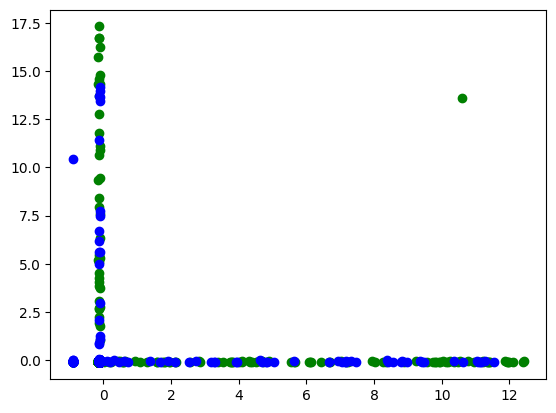

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Cores para cada classe
cores = ['r', 'g', 'b']

# Plotar um ponto para cada previsão
for classe in range(len(np.unique(ensemble_pred))):
    # Obter índices das previsões dessa classe
    indices = np.where(ensemble_pred == classe)
    # Plotar os pontos
    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=cores[classe], label=f'Classe {classe}')

# Adicionar rótulos e título
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Resultado da Previsão do Ensemble')
plt.legend()

# Mostrar o gráfico
plt.show()